<a href="https://colab.research.google.com/github/Prachi-110/Airplane-Delays/blob/main/Airplane_Delays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Airplane Delays
Summary
* Performed queries on pandas DataFrame objects.
* Created data visualizations using pandas. 

Exploring a data-set of airline delays from the [US Bureau of Transportation Statistics](https://www.transtats.bts.gov/OT_Delay/ot_delaycause1.asp?qv52ynB=qn6n&20=E). Downloaded [`airline_delay_causes_2020.csv`](https://drive.google.com/file/d/1n2XKCBwiEVdtXZiNFzoUDUvqBb8AmA-p/view?usp=sharing), which contains data from 2020.

Airport information:

* `carrier`: Airline code.
* `carrier_name`: Airline name.
* `airport`: Airport code.
* `airport_name`: Airport name.

Airport statistics:

* `arr_flights`: Number of flights which arrived at the airport.
* `arr_del15`: Number of flights delayed (at least 15 minutes late).
* `carrier_ct`: Number of flights delayed due to air carrier (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).
* `weather_ct`: Number of flights delayed due to weather.
* `nas_ct`: Number of flights delayed due to National Aviation System (e.g. non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control).
* `security_ct`: Number of flights delayed due to security (e.g. evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas).
* `late_aircraft_ct`: Number of flights delayed due to a previous flight using the same aircraft being late.
* `arr_cancelled`: Number of cancelled flights.
* `arr_diverted`: Number of diverted flights.
* `arr_delay`: Total time (minutes) of delayed flights.
* `carrier_delay`: Total time (minutes) of delayed flights due to air carrier.
* `weather_delay`: Total time (minutes) of delayed flights due to weather.
* `nas_delay`: Total time (minutes) of delayed flights due to National Aviation System.
* `security_delay`: Total time (minutes) of delayed flights due to security.
* `late_aircraft_delay`: Total time (minutes) of delayed flights due to a previous flight using the same aircraft being late.

Loadwd the data-set in Colab and call `info` to summarize it.

In [3]:
import pandas as pd

df= pd.read_csv('airline_delay_causes_2020.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18859 entries, 0 to 18858
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 18859 non-null  int64  
 1    month               18859 non-null  int64  
 2   carrier              18859 non-null  object 
 3   carrier_name         18859 non-null  object 
 4   airport              18859 non-null  object 
 5   airport_name         18859 non-null  object 
 6   arr_flights          18769 non-null  float64
 7   arr_del15            18599 non-null  float64
 8   carrier_ct           18769 non-null  float64
 9    weather_ct          18769 non-null  float64
 10  nas_ct               18769 non-null  float64
 11  security_ct          18769 non-null  float64
 12  late_aircraft_ct     18769 non-null  float64
 13  arr_cancelled        18769 non-null  float64
 14  arr_diverted         18769 non-null  float64
 15   arr_delay           18769 non-null 

`df.rename(columns = {'Code':'Code-Name', 'Weight':'Weight in kgs'}, inplace = True)`

Renaming the four columns listed above to remove the leading spaces.

In [4]:
df.rename(columns = {' month':'month', ' weather_ct':'weather_ct',' arr_delay':'arr_delay',' carrier_delay':'carrier_delay'}, inplace = True)

Calling head and then describe to see what we're dealing with in this data-set.

In [5]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2020,1,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",50.0,6.0,4.88,0.00,0.94,0.0,0.18,0.0,0.0,391.0,329.0,0.0,51.0,0.0,11.0,NaN
1,2020,1,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",111.0,14.0,7.53,0.25,2.36,0.0,3.85,0.0,1.0,1070.0,662.0,15.0,123.0,0.0,270.0,NaN
2,2020,1,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,25.0,10.70,2.74,3.83,0.0,7.74,0.0,0.0,1373.0,686.0,147.0,121.0,0.0,419.0,NaN
3,2020,1,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",3803.0,408.0,89.07,18.25,111.50,1.0,188.18,9.0,8.0,34017.0,11236.0,2644.0,4607.0,63.0,15467.0,NaN
4,2020,1,9E,Endeavor Air Inc.,ATW,"Appleton, WI: Appleton International",56.0,6.0,1.88,0.00,3.12,0.0,1.00,0.0,0.0,297.0,157.0,0.0,83.0,0.0,57.0,NaN


In [6]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
count,18859.0,18859.000000,18769.000000,18599.000000,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,0.0
mean,2020.0,6.284214,249.792424,23.222808,8.357013,1.046800,7.689545,0.082227,5.836930,14.973307,0.412595,1433.744472,599.936811,100.926475,310.696734,3.361021,418.796313,NaN
std,0.0,3.519792,734.129800,76.678424,23.944318,4.096558,31.655052,0.524711,24.125412,103.090418,1.874369,5391.978164,2226.429767,500.907269,1426.242672,23.371761,1893.686786,NaN
min,2020.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2020.0,3.000000,30.000000,2.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78.000000,20.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,2020.0,6.000000,64.000000,6.000000,2.440000,0.000000,1.230000,0.000000,1.000000,0.000000,0.000000,300.000000,123.000000,0.000000,43.000000,0.000000,41.000000,NaN
75%,2020.0,9.000000,163.000000,16.000000,6.900000,1.000000,4.700000,0.000000,3.570000,4.000000,0.000000,940.000000,405.000000,46.000000,167.000000,0.000000,232.000000,NaN
max,2020.0,12.000000,20669.000000,2605.000000,697.000000,115.460000,1105.830000,26.070000,1018.840000,4951.000000,85.000000,203424.000000,57477.000000,15912.000000,56818.000000,1185.000000,88977.000000,NaN


Created a time series line plot of canceled flights into JFK for the year 2020. Hint: select just the `month` and `arr_cancelled` fields from the data. Use `groupby` and `sum` to compute the total number of cancellations each month at JFK.

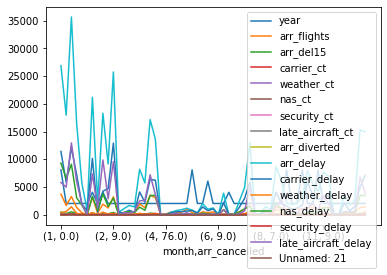

In [7]:
condition= df['airport']== 'JFK'
df[condition].groupby(['month','arr_cancelled']).sum().plot.line()

Generated a list of airports in New York.

In [8]:
df.groupby(['airport_name'])

Retrieve the rows corresponding to June 2020. There should be 1327 such rows.

In [9]:
tik= df['month']==6
df[tik]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
8530,2020,6,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",29.0,1.0,0.00,0.00,1.00,0.0,0.00,0.0,0.0,21.0,0.0,0.0,21.0,0.0,0.0,NaN
8531,2020,6,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",29.0,2.0,0.92,0.00,1.00,0.0,0.08,1.0,0.0,65.0,45.0,0.0,16.0,0.0,4.0,NaN
8532,2020,6,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",3.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
8533,2020,6,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",29.0,1.0,1.00,0.00,0.00,0.0,0.00,0.0,0.0,38.0,38.0,0.0,0.0,0.0,0.0,NaN
8534,2020,6,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",60.0,1.0,0.67,0.00,0.33,0.0,0.00,0.0,0.0,21.0,14.0,0.0,7.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9852,2020,6,YX,Republic Airline,STL,"St. Louis, MO: St Louis Lambert International",49.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
9853,2020,6,YX,Republic Airline,TPA,"Tampa, FL: Tampa International",30.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
9854,2020,6,YX,Republic Airline,TVC,"Traverse City, MI: Cherry Capital",30.0,3.0,0.00,0.99,0.39,0.0,1.63,0.0,0.0,198.0,0.0,61.0,25.0,0.0,112.0,NaN
9855,2020,6,YX,Republic Airline,TYS,"Knoxville, TN: McGhee Tyson",27.0,1.0,1.00,0.00,0.00,0.0,0.00,0.0,0.0,58.0,58.0,0.0,0.0,0.0,0.0,NaN


Compute and display the number of arrivals at each airport during June 2020.

In [10]:
df.groupby([tik,'airport','arr_flights']).size()

month  airport  arr_flights
False  ABE      4.0            1
                17.0           1
                21.0           1
                23.0           1
                25.0           1
                              ..
True   XNA      60.0           1
                134.0          1
       XWA      48.0           1
       YAK      60.0           1
       YUM      89.0           1
Length: 15121, dtype: int64

 Displayed the names and number of arrivals of the 10 busiest airports in June 2020 ("busiest" in terms of total number of arrivals).

In [11]:
df['arr_flights'].sort_values().head(10)

7971     1.0
12627    1.0
4671     1.0
12739    1.0
8114     1.0
12741    1.0
12780    1.0
15704    1.0
10290    1.0
8130     1.0
Name: arr_flights, dtype: float64

Created a horizontal bar chart showing the names and number of arrivals of the 10 busiest airports in June 2020. 

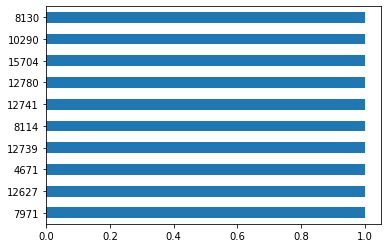

In [12]:
df['arr_flights'].sort_values().head(10).plot.barh()